In [108]:
# nessesary import
from GA import GeneticAlgorythm
import GA
import solver
import numpy as np
import matplotlib.pyplot as plt

import time


%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [109]:

def test_algorithm(target, algorythm, iterations=10, verbose=False, coins=None,
                   GA=False):
    ''' Z próby 'iterations wyznacza dokładność oraz średni czas obliczeń
    '''
    times = []
    corrects = []
    for i in range(iterations):
        start = time.clock()
        if GA:
            corrects.append(np.sum(np.multiply(our_solution[0], coins)) == target)

        else:
            corrects.append(np.sum(algorythm()) == target)

        end = time.clock()
        times.append(end-start)

    mean_time = np.mean(times)
    accuracy = np.sum(corrects) / len(corrects)

    if verbose:
        print("\t accuracy: {0}    mean time: {1:.8f}s"
              .format(accuracy, mean_time))

    return accuracy, mean_time


In [110]:

params = dict()
seed = 'PSZT'
verbose = True

# Metody corssowania:
# 1: pół na pół; 2: naprzemiennie
params = {
    'population_size': 50,
    'elite_num': 2,
    'leave': 0.20,  # próg selekcji progowej
    'random_leave': 0.1,  # p-nstwo udzialu punktu w dalszej reprodukcji
    'mutation': 0.5,
    'crossing_method': 2
}

loss_params = {
    'penalty_param1': 100,
    'penalty_param2': 1.5
}

iterations = 100
target = 200



In [112]:
# sanity check - nasz algorytm powinien działać dla powyżysz/poniższych ustawień

coins=[1,2,5,10,20,50,100,200,500]

target = 420
seed = 'PSZT'

params['elite_num'] = 2
alg = GeneticAlgorythm(target, coins, **params, **loss_params, seed=seed,
                         verbose=False)

correct_solution = solver.coin_change_greedy(target, coins)
our_solution = alg.run(750)


print("correct: ", correct_solution)
print()
print("selected coins: ", our_solution[0])
print("coins: ", np.sum(our_solution[0]))
print("coins sum: ", np.sum(np.multiply(our_solution[0], coins)))



correct:  [200, 200, 20]

selected coins:  [59, 3, 3, 9, 0, 1, 0, 1, 0]
coins:  76
coins sum:  420


In [114]:
# Pomiar czasu oraz skuteczności odtrzymania rozwiązania przez nasz algorytm oraz algorytm zachłanny

print("Algorytm zachłany:")
test_algorithm(target,
               algorythm=lambda: solver.coin_change_greedy(target, coins),
               iterations=10,
               verbose=True)

print("Algorytm ewolucyjny:")
test_algorithm(target,
               algorythm=lambda: alg.run(300),
               iterations=10,
               verbose=True, GA=True, coins=coins)

Algorytm zachłany:
	 accuracy: 1.0    mean time: 0.00008110s
Algorytm ewolucyjny:
	 accuracy: 1.0    mean time: 0.00006970s


(1.0, 6.9700000005923363e-05)

# Przykład prezentujący naszą naszą f-cje celu. 
Rozważany jest przypadek 2d czyli do znalezienia rozwiązania algorytm ma tylko 2 typy monet.


In [115]:

target = 46
seed = 'PSZT'

coins = [3,5]

params['elite_num'] = 1
alg = GeneticAlgorythm(target, coins, **params, **loss_params, seed=seed,
                         verbose=False)

alg.run(300)
pop_1 = alg.population

alg.run(300)
pop_2 = alg.population

our_solution = alg.run(300)
pop_3 = alg.population


print("our: ", our_solution[0])
print("sum: ", np.sum(np.multiply(our_solution[0], coins)))
print("num: ", np.sum(our_solution[0]))
print("loss: ", our_solution[1])


our:  [2, 8]
sum:  46
num:  10
loss:  15.0


/home/dave/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/contour.py:370: RuntimeWarning: invalid value encountered in true_divide
  dist = np.add.reduce(([(abs(s)[i] / L[i]) for i in range(xsize)]), -1)


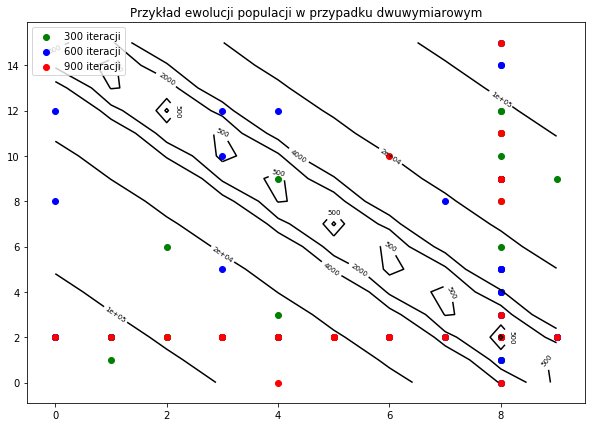

In [116]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import math

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'
matplotlib.rcParams['contour.negative_linestyle'] = 'solid'

fn = alg.fitness
max_x = math.floor(target/coins[1])+1  # liczba 10
max_y = math.floor(target/coins[0])+1  # liczba 5

x = np.arange(0, max_x, 1)
y = np.arange(0, max_y, 1)

X, Y = np.meshgrid(x, y)
z = np.zeros((max_y, max_x))
for i in range(max_x):
    for j in range(max_y):
        z[j,i] = fn([j,i], target)
        #print("z[{},{}]={}".format(j,i,fn([i,j],target)))


levels = [10, 100, 500, 2000, 4000, 20000, 100000]  # Levels must be increasing.
plt.figure(figsize=(10,7))
CS = plt.contour(x, y, z, 6,
                 colors='k',  # negative contours will be dashed by default
                 levels=levels
                 )
plt.clabel(CS, inline=1, fontsize=7, fmt='%0.4g')

points = list(zip(*pop_1))
points = [points[1], points[0]]
plt.scatter(*points, c='g')

points = list(zip(*pop_2))
points = [points[1], points[0]]
plt.scatter(*points, c='b')

points = list(zip(*pop_3))
points = [points[1], points[0]]
plt.scatter(*points, c='r')

plt.title('Przykład ewolucji populacji w przypadku dwuwymiarowym')
plt.legend(['300 iteracji', '600 iteracji', '900 iteracji'])
plt.show()


# Eksperymentalne wyznaczenie parametrów.
Najpierw mniej wiecej sie wyznaczy parametry, na podstawie uruchomień z
małą liczbą iteracji.


==========settings=============
target: 437 
coins: [1, 2, 5, 10, 20, 50, 100, 200, 500]
iterations: 10

ITERATION 0
+-+-+-+-+-parameters+-+-+-+-+-+
----------results-------------
sum:  437
coin num:  131
loss:  196.5

ITERATION 1
+-+-+-+-+-parameters+-+-+-+-+-+
----------results-------------
sum:  438
coin num:  53
loss:  129.5

ITERATION 2
+-+-+-+-+-parameters+-+-+-+-+-+
----------results-------------
sum:  437
coin num:  34
loss:  51.0

ITERATION 3
+-+-+-+-+-parameters+-+-+-+-+-+
----------results-------------
sum:  437
coin num:  92
loss:  138.0

ITERATION 4
+-+-+-+-+-parameters+-+-+-+-+-+
----------results-------------
sum:  437
coin num:  80
loss:  120.0

ITERATION 5
+-+-+-+-+-parameters+-+-+-+-+-+
----------results-------------
sum:  437
coin num:  121
loss:  181.5

ITERATION 6
+-+-+-+-+-parameters+-+-+-+-+-+
----------results-------------
sum:  437
coin num:  72
loss:  108.0

ITERATION 7
+-+-+-+-+-parameters+-+-+-+-+-+
----------results-------------
sum:  437
coin num:  103
los

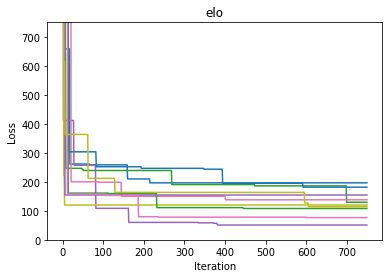

In [118]:
import random
target=437
coins=[1,2,5,10,20,50,100,200,500]
seed="PSZT0"

params['elite_num'] = 2
alg = GeneticAlgorythm(target, coins, **params, **loss_params, seed=seed,
                         verbose=False)


alg_iterations = 750
iterations = 10

parameters = [50,100,300,600]

data = dict()
history = dict()
mean_loss = dict()


print("==========settings=============")
print("target: {} \ncoins: {}".format(target, coins))
print("iterations: {}".format(iterations))
print()
for param in parameters:
    alg.penalty_param1 = param
    data[param] = []
    
    for i in range(iterations):
        # change seed for random generator
        GA.random.seed(a="PSZT{}".format(i))
        random.seed(a="PSZT{}".format(i))

        result = alg.run(alg_iterations)
        data[param].append(alg.best[1])
        history[(param, i)] = alg.best_history
        mean_loss[(param, i)] = alg.fitness_history

        print("ITERATION {}".format(i))
        print("+-+-+-+-+-parameters+-+-+-+-+-+")
        #print("kara_param: ", alg.kara_param)
        print("----------results-------------")
        print("sum: ", np.sum(np.multiply(result[0], coins)))
        print("coin num: ", np.sum(result[0]))
        print("loss: ", result[1])
        print()
        alg.annihilate_popultaion()

# wykres
plt.title('elo')
for i in range(iterations):
    plt.plot(history[50,i])
    plt.plot(mean_loss[(50, i)])
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.ylim(0, 750)

plt.figure(figsize=(10,7))
plt.show()

# Przebiegi najmniejszej wartości funkcji celu w zależności od 'param_kara'


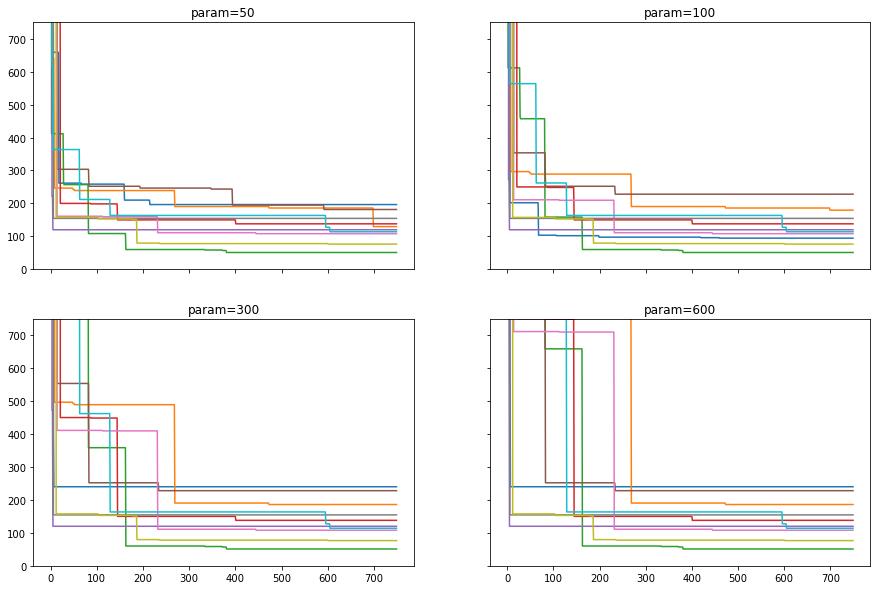

In [75]:

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row',figsize=(15,10))
ax1.set_title('param=50')
ax2.set_title('param=100')
ax3.set_title('param=300')
ax4.set_title('param=600')

ax1.set_ylim([0, 750])
ax2.set_ylim([0, 750])
ax3.set_ylim([0, 750])
ax4.set_ylim([0, 750])

for i in range(iterations):
    ax1.plot(history[50,i])
    ax2.plot(history[100,i])
    ax3.plot(history[300,i])
    ax4.plot(history[600,i])

ax1.ploy()
plt.show()


In [52]:
# ucinam pierwsze  duże wartości bo bedą przydko wyglądały na wykresie
x1 = np.array(data[50])
x1 = x1[x1<700]
x2 = np.array(data[100])
x2 = x2[x2<700]
x3 = np.array(data[300])
x3 = x3[x3<700]
x4 = np.array(data[600])
x4 = x4[x4<700]



# Empiryczna dystrybuanta
Nie wydaje mi się żeby coś sensownego z niej wynikało xd ale spoko wygląda

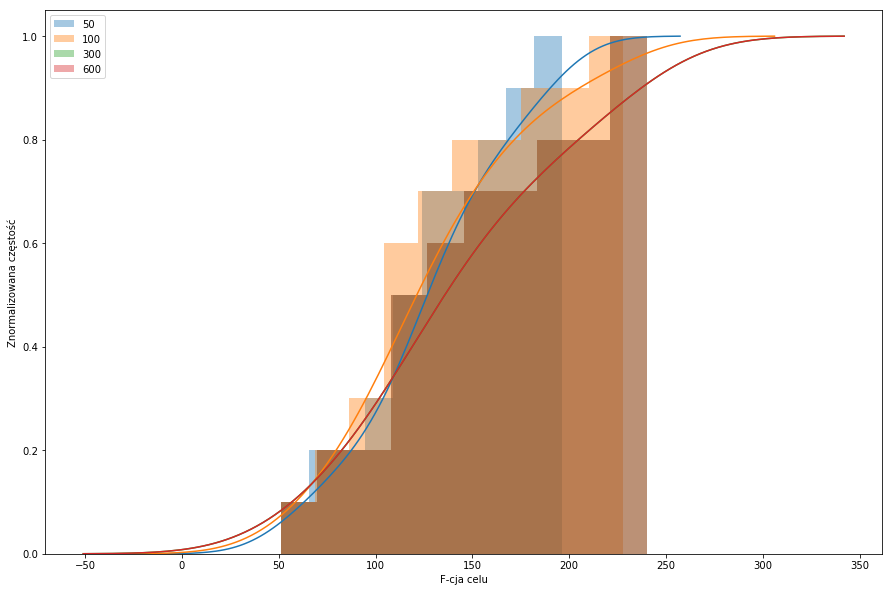

In [83]:
import numpy as np
import seaborn as sns
plt.figure(figsize=(15,10))

X = [x1,x2,x3,x4]

labels = ["50","100","300","600"]
for x, label in zip(X,labels):
    sns.distplot(x,
                 hist_kws=dict(cumulative=True),
                 kde_kws=dict(cumulative=True),
                 label=label,
                 bins=10)

plt.xlabel('F-cja celu')
plt.ylabel('Znormalizowana częstość')
plt.legend()
plt.show()